1.0/(1.0 + 16.8272567955368*exp(-0.62*x))


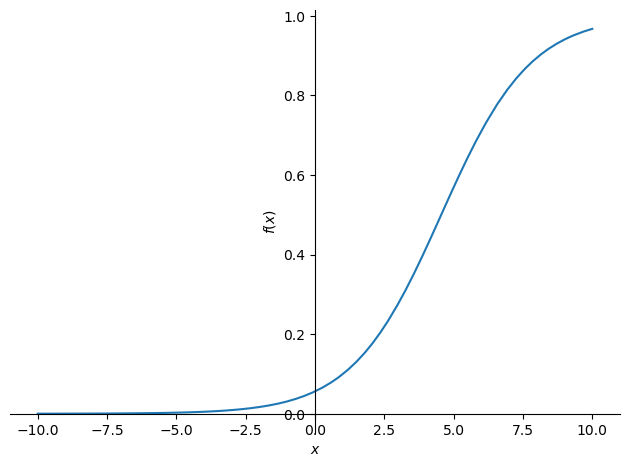

In [1]:
# Logistic function for Logistic Regression in sympy
from sympy import *
b0, b1, x = symbols('b0 b1 x')

# Logistic function formula
p = 1.0/(1.0 + exp(-(b0 + b1 * x)))

# I assume that the b0 factor is -2.823 and b1 is 0.62
p = p.subs(b0, -2.823)
p = p.subs(b1, 0.620)
print(p)

# Graph generastion
plot(p)

In [3]:
# Simply Logistic Regression using SciPy
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Import data
df = pd.read_csv('https://bit.ly/33ebs2R', delimiter=",")
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

# Logistic Regression (penalty off)
model = LogisticRegression(penalty= None)
model.fit(X, Y)

# Coefficients beta1(b1) and beta0(b0)
b1 = model.coef_[0][0]  # beta1
b0 = model.intercept_[0]  # beta0

print("Coefficients:")
print("beta1:", b1)
print("beta0:", b0)

Coefficients:
beta1: 0.6926893863085579
beta0: -3.175805042563376


In [5]:
# 1. class prediction (0 or 1)
# Returns the predicted class labels
y_pred = model.predict(X) 
print("\n Class prediction(predict 0 or 1):", y_pred)

# 2. Predicting probabilities (P(Y=0), P(Y=1))
# Returns probability
y_prob = model.predict_proba(X)
print("\n Logistic Regression Probability prediction (percent of prediction for each value):\n", y_prob)


 Class prediction(predict 0 or 1): [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]

 Logistic Regression Probability prediction (percent of prediction for each value):
 [[0.92294966 0.07705034]
 [0.89442609 0.10557391]
 [0.84827785 0.15172215]
 [0.81955722 0.18044278]
 [0.80908591 0.19091409]
 [0.73661877 0.26338123]
 [0.56623582 0.43376418]
 [0.53194935 0.46805065]
 [0.49735849 0.50264151]
 [0.44562268 0.55437732]
 [0.39503894 0.60496106]
 [0.33109083 0.66890917]
 [0.25930188 0.74069812]
 [0.22142058 0.77857942]
 [0.19846038 0.80153962]
 [0.15802186 0.84197814]
 [0.11020643 0.88979357]
 [0.09733682 0.90266318]
 [0.06643505 0.93356495]
 [0.05118042 0.94881958]
 [0.03928114 0.96071886]]


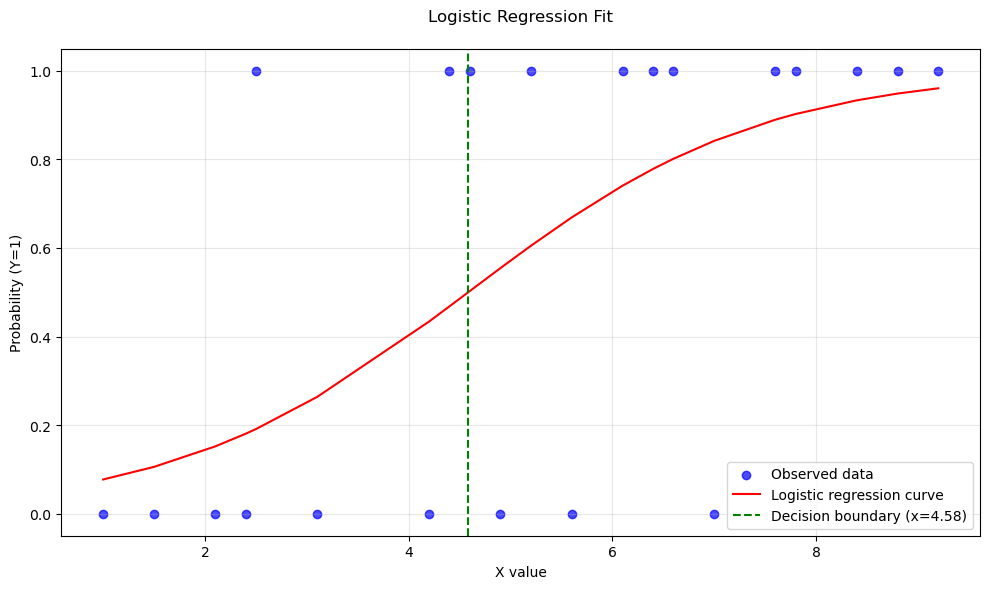

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Create plot
plt.figure(figsize=(10, 6))

# Plot original data points
plt.scatter(X, Y, color='blue', label='Observed data', alpha=0.7)

# Generate and plot sigmoid curve
x_values = X
def sigmoid(x):
    return 1 / (1 + np.exp(-(b0 + b1 * x)))

y_probs = sigmoid(x_values)
plt.plot(x_values, y_probs, color='red', 
         label='Logistic regression curve')

# Add decision boundary (P=0.5)
decision_boundary = -b0/b1
plt.axvline(x=decision_boundary, color='green', linestyle='--', 
            label=f'Decision boundary (x={decision_boundary:.2f})')


# Customize plot
plt.title('Logistic Regression Fit', pad=20)
plt.xlabel('X value')
plt.ylabel('Probability (Y=1)')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.ylim(-0.05, 1.05)  # Slightly expand y-axis limits

plt.tight_layout()
plt.show()

In [9]:
# Selecting specific indices
selected_index = [6, 12, 20]
new_X = X[selected_index]  # This automatically selects rows and maintains 2D structure

# Prediction
print("\nPredictions for selected X values:")
print(f"X values: {new_X.tolist()}")
print("Predicted classes:", model.predict(new_X))
print("Predicted probabilities:\n", model.predict_proba(new_X))


Predictions for selected X values:
X values: [[4.2], [6.1], [9.2]]
Predicted classes: [0 1 1]
Predicted probabilities:
 [[0.56623582 0.43376418]
 [0.25930188 0.74069812]
 [0.03928114 0.96071886]]
